# Árboles de decisión

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Criterios de selección 
En el proceso de creación de los árboles de decisión se suelen utilizar algunas de las siguientes tres medidas de impureza:

* Entropía (“entropy”)
$$
I_E(x)=-\sum_{i=1}^c p(i|x) \log_2 \left(p(i|x)\right)
$$
* El índice Gini (“Gini index”)
$$
I_G(x)=\sum_{i=1}^c p(i|x) \left(-p(i|x) \right) = 1 - \sum_{i=1}^c p(i|x)^2
$$
* Error de clasificación (“classification error”)
$$
I_{CE}(x)=1- \max\left\{p(i|x)\right\}
$$

En estas ecuaciones $p(i|x)$ es la probabilida de la clase $i$.

Se pueden implementar tres funciones que permitan implementar estas medidas.

In [2]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return [-p * np.log2(p) - (1 - p) * np.log2(1 - p) if p != 0 else None for p in x]
    
def classification_error(p):
    return [1 - np.max([i, 1 - i]) for i in p]

Ahora se puede comprobar el resultado

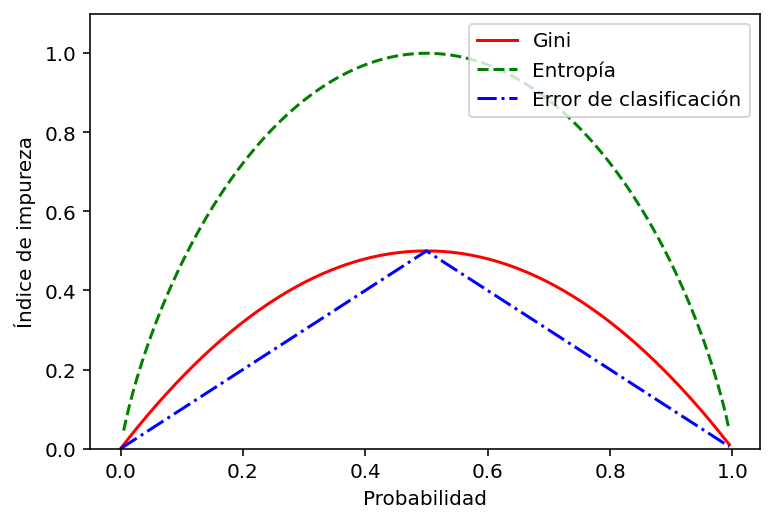

In [3]:
x = np.arange(0.0, 1.0, 0.005)

plot(x, gini(x), label = 'Gini', linestyle = '-', color = 'r')
plot(x, entropy(x), label = 'Entropía', linestyle = '--', color = 'g')
plot(x, classification_error(x), label = 'Error de clasificación', linestyle = '-.', color = 'b')

ylim([0, 1.1])
xlabel('Probabilidad')
ylabel(u'Índice de impureza')
legend(('Gini', 'Entropía', 'Error de clasificación'), loc=1)

## Clasificador de ejemplo

Por ejemplo, se puede utilizar un clasificador de DecisionTreeClassifier para separar tres conjuntos de datos creados con `make_blobs`.

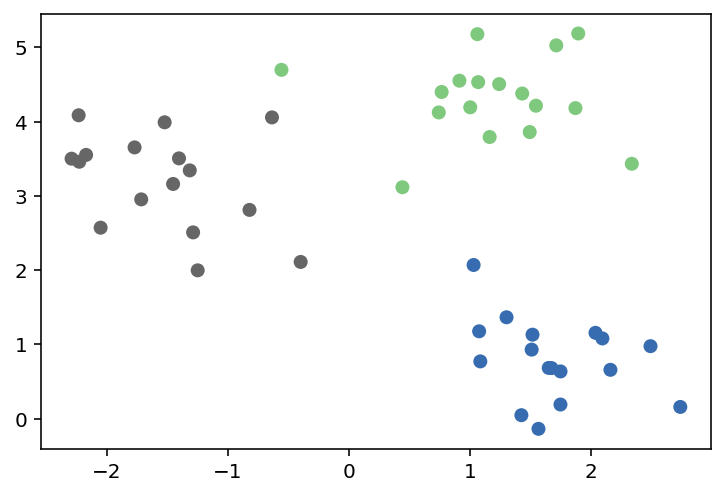

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50,
                  centers = 3,
                  random_state = 0,
                  cluster_std = 0.60)

scatter(X[:, 0], X[:, 1], c = y, cmap = 'Accent')

Se puede importar la función para representar los datos

In [5]:
from matplotlib.colors import ListedColormap

def plot_clasificator_areas(clf, X, y):
    # Version clara y oscura de los coloes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creación de un conjunto de datos para 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pcolormesh(xx, yy, Z, cmap = cmap_light)
    scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())

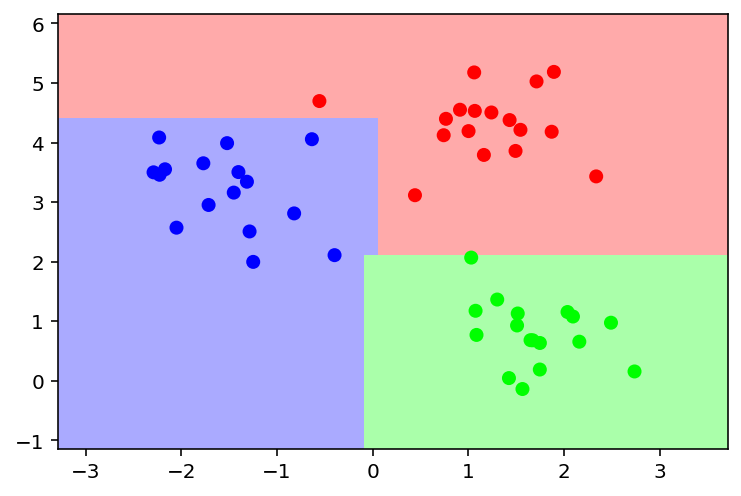

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              random_state = 0)

tree = tree.fit(X, y)
plot_clasificator_areas(tree, X, y)

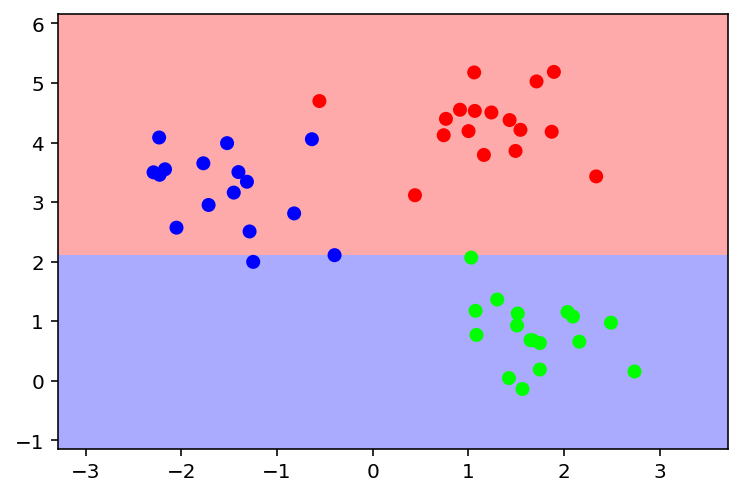

In [7]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 1,
                              random_state = 0)

tree = tree.fit(X, y)
plot_clasificator_areas(tree, X, y)

El problema parece que se ha resuelto bien, probemos con uno más complejo.

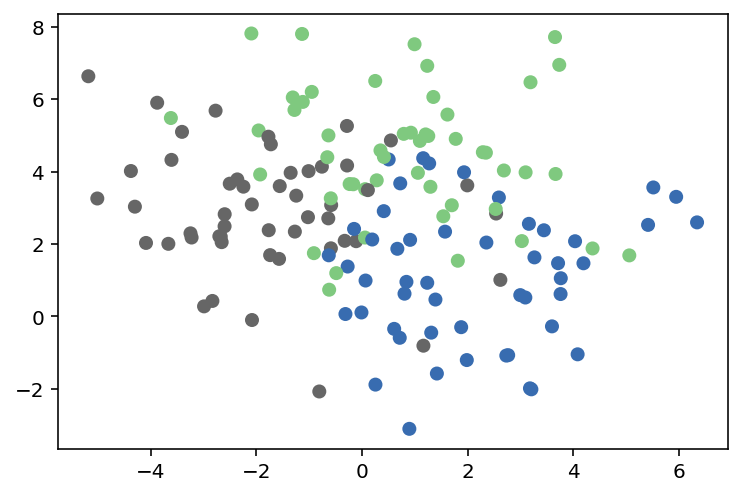

In [8]:
X, y = make_blobs(n_samples = 150,
                  centers = 3,
                  random_state = 0,
                  cluster_std = 1.80)

scatter(X[:, 0], X[:, 1], c = y, cmap = 'Accent')

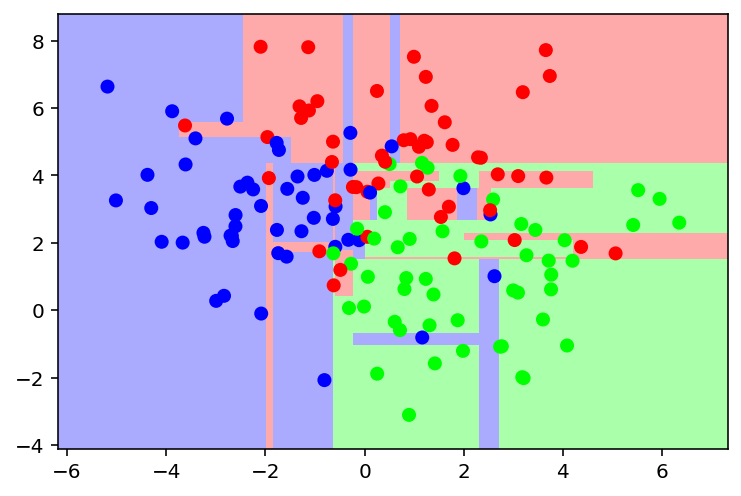

In [9]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              random_state = 0)

tree = tree.fit(X, y)
plot_clasificator_areas(tree, X, y)

En este caso se puede observar claramente sobreajuste debido a que no se ha fijado el un valor máximo para la profundidad del árbol. En caso de que se fije a 2 se puede encontrar.

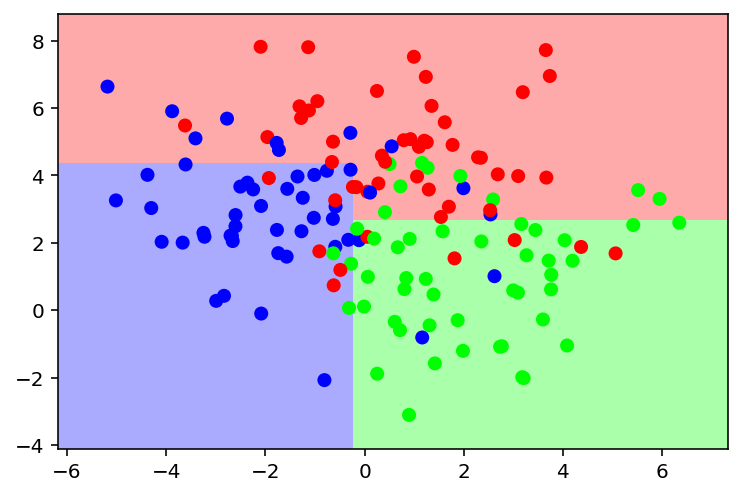

In [10]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 2,
                              random_state = 0)

tree = tree.fit(X, y)
plot_clasificator_areas(tree, X, y)

El proceso se puede repetir utilizando Random Forest.

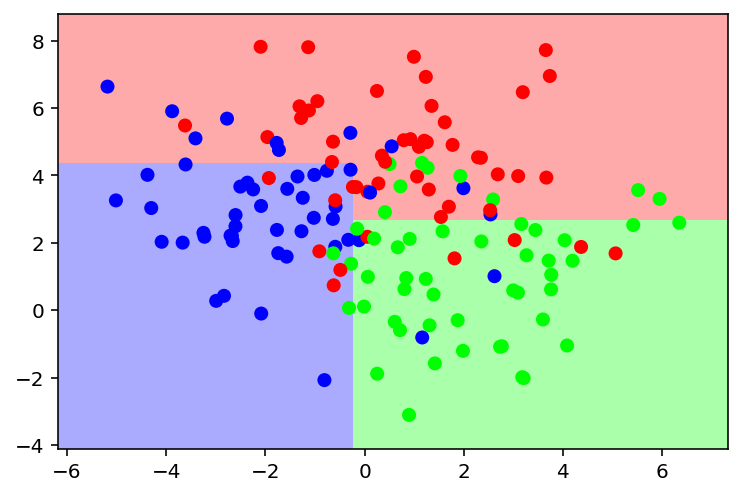

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy',
                                n_estimators = 10,
                                random_state = 0)

forest = forest.fit(X, y)

plot_clasificator_areas(tree, X, y)

En este caso también se puede limitar la profundidad de los árboles.

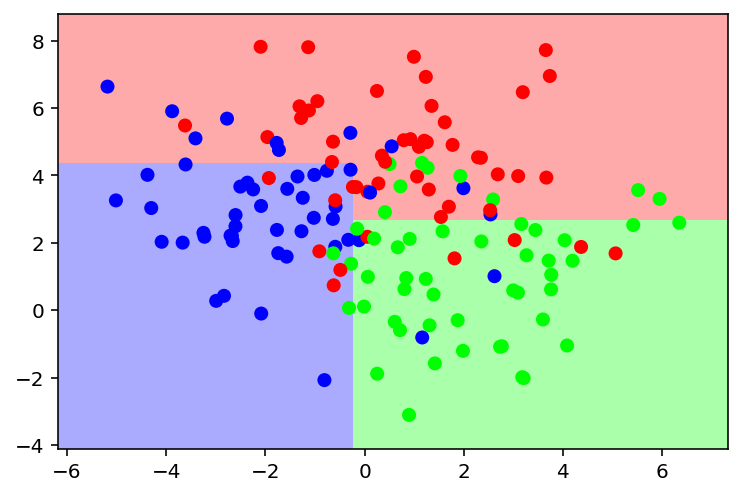

In [12]:
forest = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 2,
                                n_estimators = 10,
                                random_state = 0)

forest = forest.fit(X, y)

plot_clasificator_areas(tree, X, y)

## Aplicación al conjunto de datos de Iris
El conjunto de datos Iris contiene 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor) en las que se midieron cuatro rasgos de cada muestra: el largo y el ancho de los sépalos y pétalos. Es un conjunto de datos muy utilizado para la construcción de modelos de ejemplo, encontrándose disponible en scikit-learn. La importación de los datos se realiza utilizando la función `load_iris` que se encuentra disponible en el conjunto de datos de ejemplo de scikit-learn (`sklearn.datasets`).

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# Para facilitar solamente se utilizan las dos primeras celdas
X = iris.data[:, 0:2]
y = iris.target

# Se divide el conjunto en entreniento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

Se crea una nueva función para reconocer los valores de entrenamiento

In [14]:
def plot_clasificator_areas(clf, X, y, test_idx = None):
    # Version clara y oscura de los coloes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creación de un conjunto de datos para 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pcolormesh(xx, yy, Z, cmap = cmap_light)
    scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())
    
    if test_idx != None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        scatter(X_test[:, 0], X_test[:, 1],
                edgecolors = 'k',
                facecolors = 'none',
                label = 'Test')

Ahora se puede comprobar el resultado

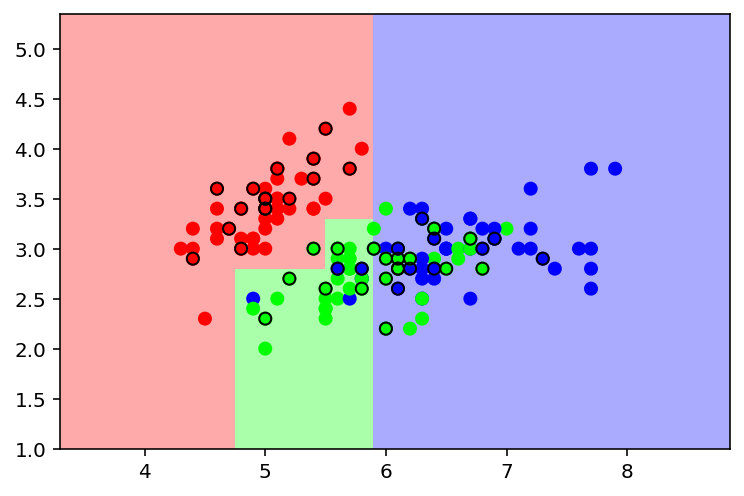

In [15]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 3,
                              random_state = 0)
tree = tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_clasificator_areas(tree, X_combined, y_combined,
                        test_idx = range(len(y_train), len(y_combined)))

Utilizando Random Forest

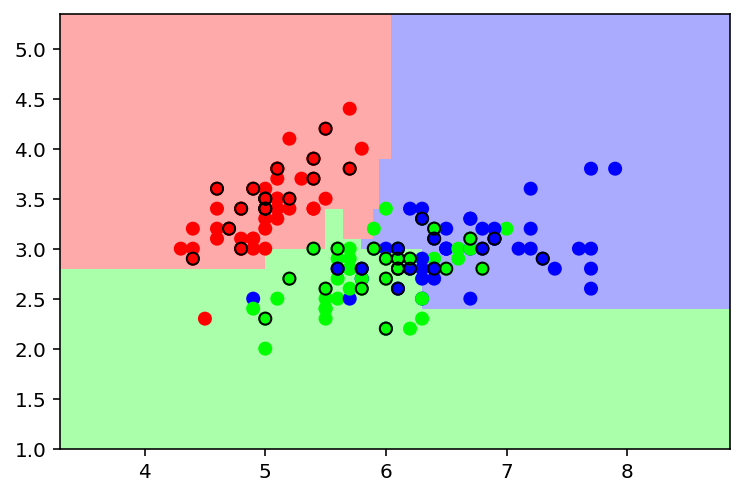

In [16]:
forest = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 3,
                                n_estimators = 10,
                                random_state = 0)
forest = forest.fit(X_train, y_train)

plot_clasificator_areas(forest, X_combined, y_combined,
                        test_idx = range(len(y_train), len(y_combined)))